In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
sns.set_style('whitegrid')

In [32]:
data = pd.read_csv('aggregated-accuracy-values.csv', delim_whitespace=True).set_index('language')
data = data.reindex(sorted(data.columns), axis=1)
data

,average-lingua,average-optimaize,average-tika,sentences-lingua,sentences-optimaize,sentences-tika,single-words-lingua,single-words-optimaize,single-words-tika,word-pairs-lingua,word-pairs-optimaize,word-pairs-tika
language,,,,,,,,,,,,
Afrikaans,78.366667,39.133333,70.400000,96.600000,93.100000,97.600000,60.400000,2.600000,43.900000,78.100000,21.700000,69.700000
Arabic,99.033333,90.833333,97.800000,99.900000,99.800000,100.000000,97.800000,77.200000,94.700000,99.400000,95.500000,98.700000
Belarusian,98.200000,91.233333,97.866667,99.200000,99.500000,99.800000,96.100000,78.400000,94.900000,99.300000,95.800000,98.900000
Bulgarian,94.200000,57.700000,88.833333,99.100000,96.800000,99.100000,87.900000,25.000000,78.600000,95.600000,51.300000,88.800000
Catalan,74.400000,31.700000,58.500000,87.300000,76.800000,84.600000,57.200000,2.100000,33.300000,78.700000,16.200000,57.600000
Croatian,93.366667,69.433333,88.500000,99.300000,99.100000,100.000000,84.600000,33.900000,74.100000,96.200000,75.300000,91.400000
Czech,88.433333,70.666667,82.400000,94.600000,89.400000,93.000000,79.400000,47.100000,68.400000,91.300000,75.500000,85.800000
Danish,83.133333,33.566667,72.433333,98.400000,80.400000,93.400000,66.300000,4.500000,52.600000,84.700000,15.800000,71.300000
Dutch,78.300000,39.000000,60.433333,96.500000,91.500000,97.600000,57.300000,6.200000,31.600000,81.100000,19.300000,52.100000


In [33]:
data.mean()

average-lingua            89.340058
average-optimaize         62.090325
average-tika              80.661229
sentences-lingua          98.056231
sentences-optimaize       94.959278
sentences-tika            97.974972
single-words-lingua       78.275985
single-words-optimaize    33.053690
single-words-tika         62.782765
word-pairs-lingua         91.687957
word-pairs-optimaize      58.258007
word-pairs-tika           81.225950
dtype: float64

In [34]:
data.std()

average-lingua             7.463676
average-optimaize         18.787085
average-tika              11.726063
sentences-lingua           2.703147
sentences-optimaize        6.132160
sentences-tika             3.101810
single-words-lingua       13.370819
single-words-optimaize    23.697693
single-words-tika         19.057408
word-pairs-lingua          7.893607
word-pairs-optimaize      28.887274
word-pairs-tika           14.758004
dtype: float64

In [35]:
data.median()

average-lingua            92.150000
average-optimaize         66.283333
average-tika              85.133333
sentences-lingua          99.050000
sentences-optimaize       97.300000
sentences-tika            99.250000
single-words-lingua       82.100000
single-words-optimaize    32.900000
single-words-tika         67.700000
word-pairs-lingua         94.950000
word-pairs-optimaize      69.050000
word-pairs-tika           87.000000
dtype: float64

In [36]:
### LINE PLOT CREATION ###
def create_lineplot(data, columns, title, ylim):
    filtered_data = data.loc[:, columns]
    
    plt.figure(figsize=(32,12))
    plt.title(title, fontsize=45, fontweight='bold')
    plt.xticks(rotation=90, fontsize=35)
    plt.yticks(fontsize=35)
    plt.grid(color='#A6A6A6')
    
    ax = sns.lineplot(data=filtered_data, linewidth=5, palette=['green', 'orange', 'red'])
    ax.set_ylim(ylim)
    ax.legend(labels=['Lingua', 'Tika', 'Optimaize'], fontsize=28, loc='lower left')
    ax.set_xlabel('Language', fontsize=38, fontweight='bold')
    ax.set_ylabel('Accuracy (%)', fontsize=38, fontweight='bold')

    plt.show()
    
### BOX PLOT CREATION ###    
def create_boxplot(data, columns, title, ylim):
    filtered_data = data.loc[:, columns]

    plt.figure(figsize=(32,12))
    plt.title(title, fontsize=45, fontweight='bold')
    plt.xticks(fontsize=35)
    plt.yticks(fontsize=35)
    plt.grid(color='#A6A6A6')

    ax = sns.boxplot(data=filtered_data, linewidth=5, palette=['red', 'orange', 'green'])
    ax.set_ylim(ylim)
    ax.set_xlabel('Classifier', fontsize=38, fontweight='bold')
    ax.set_ylabel('Accuracy (%)', fontsize=38, fontweight='bold')
    ax.set_xticklabels(['Optimaize', 'Tika', 'Lingua'])

    plt.show()

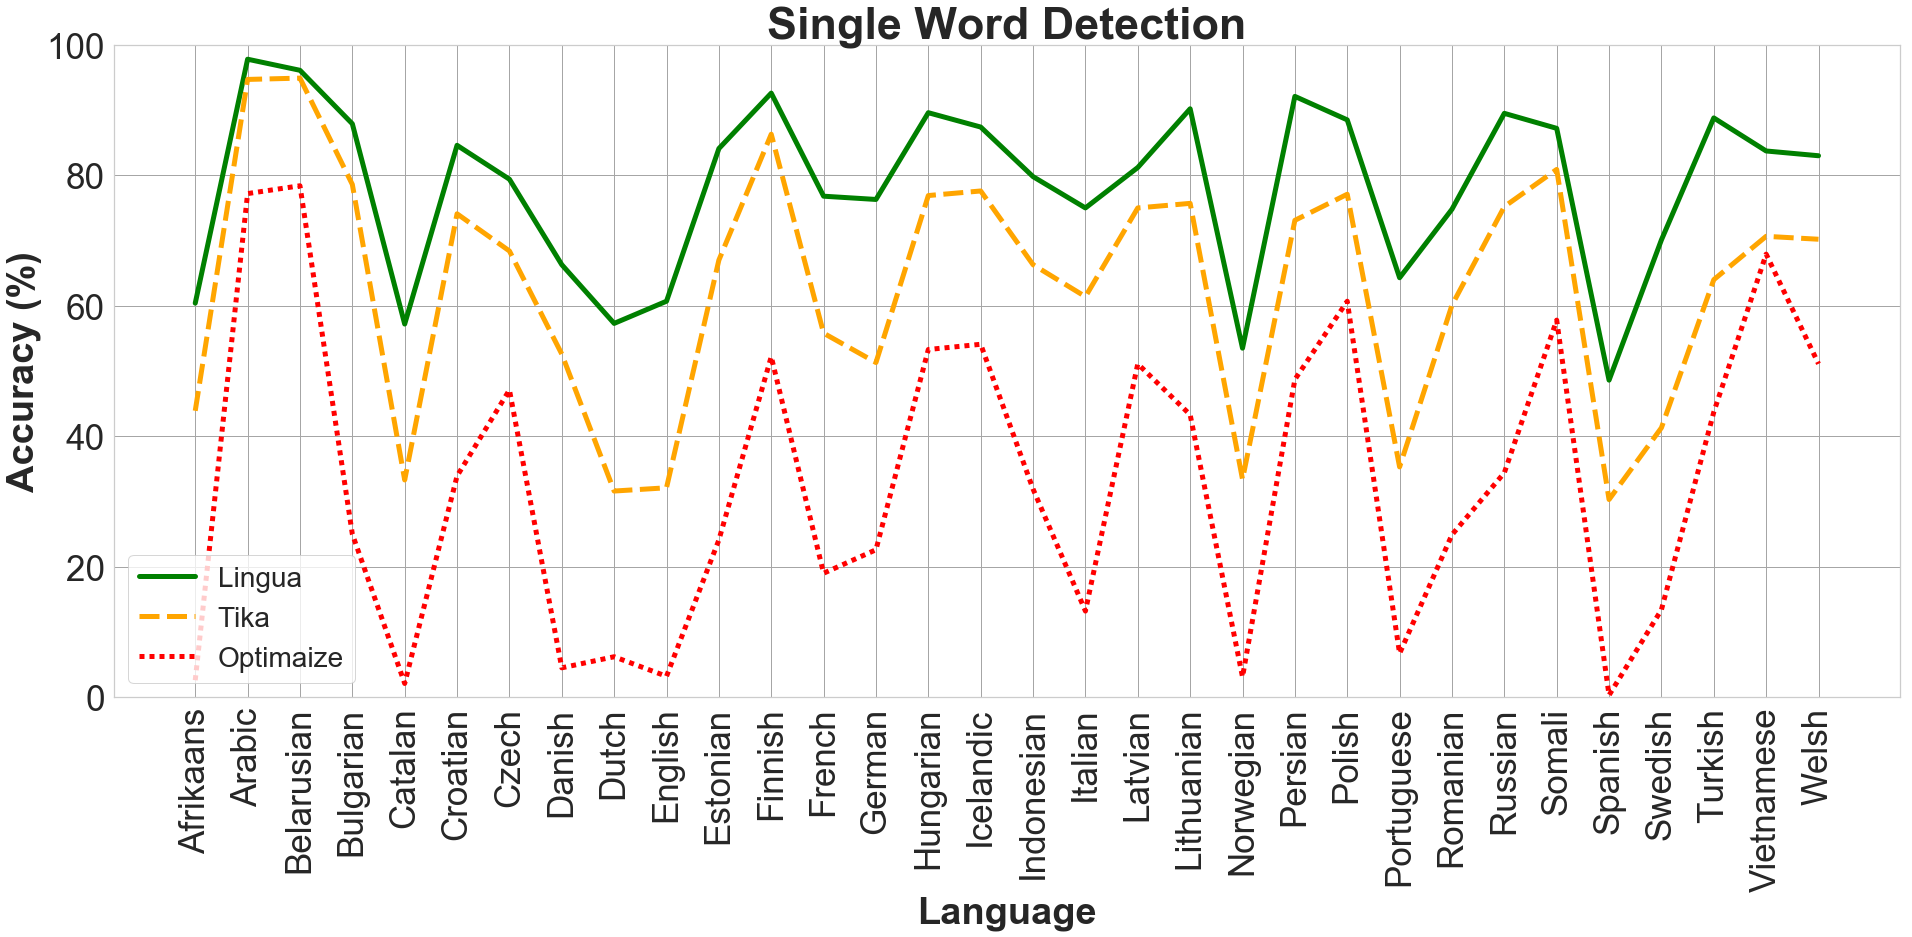

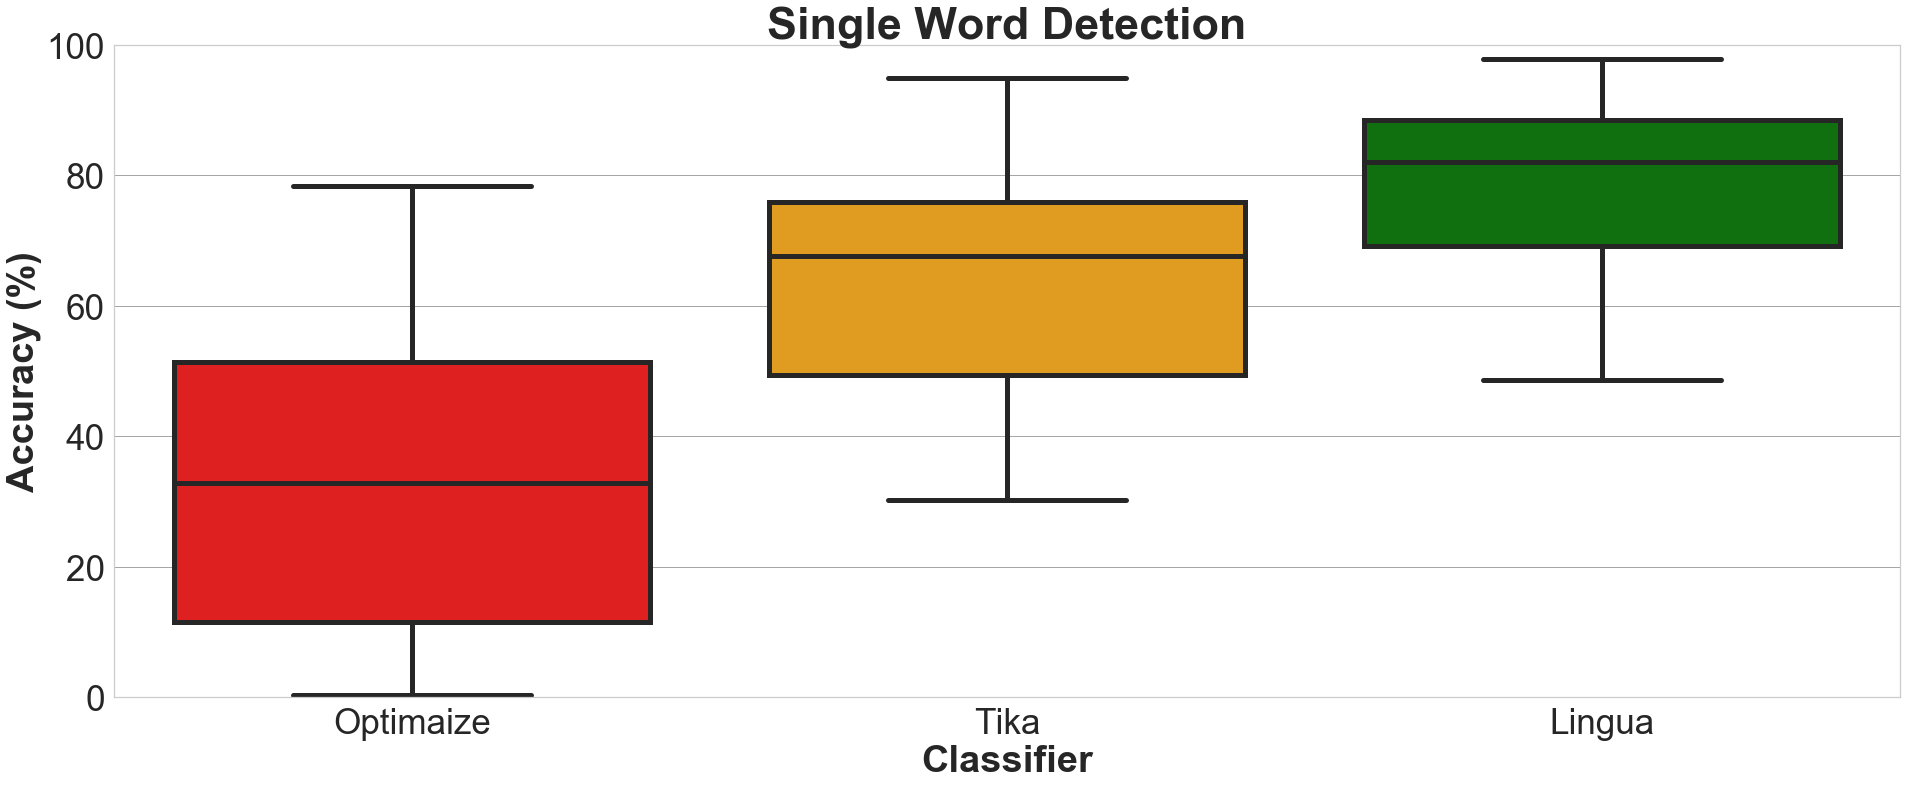

In [37]:
### SINGLE WORD DETECTION ACCURACY ###
create_lineplot(
    data=data, 
    columns=['single-words-lingua', 'single-words-tika', 'single-words-optimaize'], 
    title='Single Word Detection',
    ylim=[0,100]
)

create_boxplot(
    data=data,
    columns=['single-words-optimaize', 'single-words-tika', 'single-words-lingua'],
    title='Single Word Detection',
    ylim=[0,100]
)

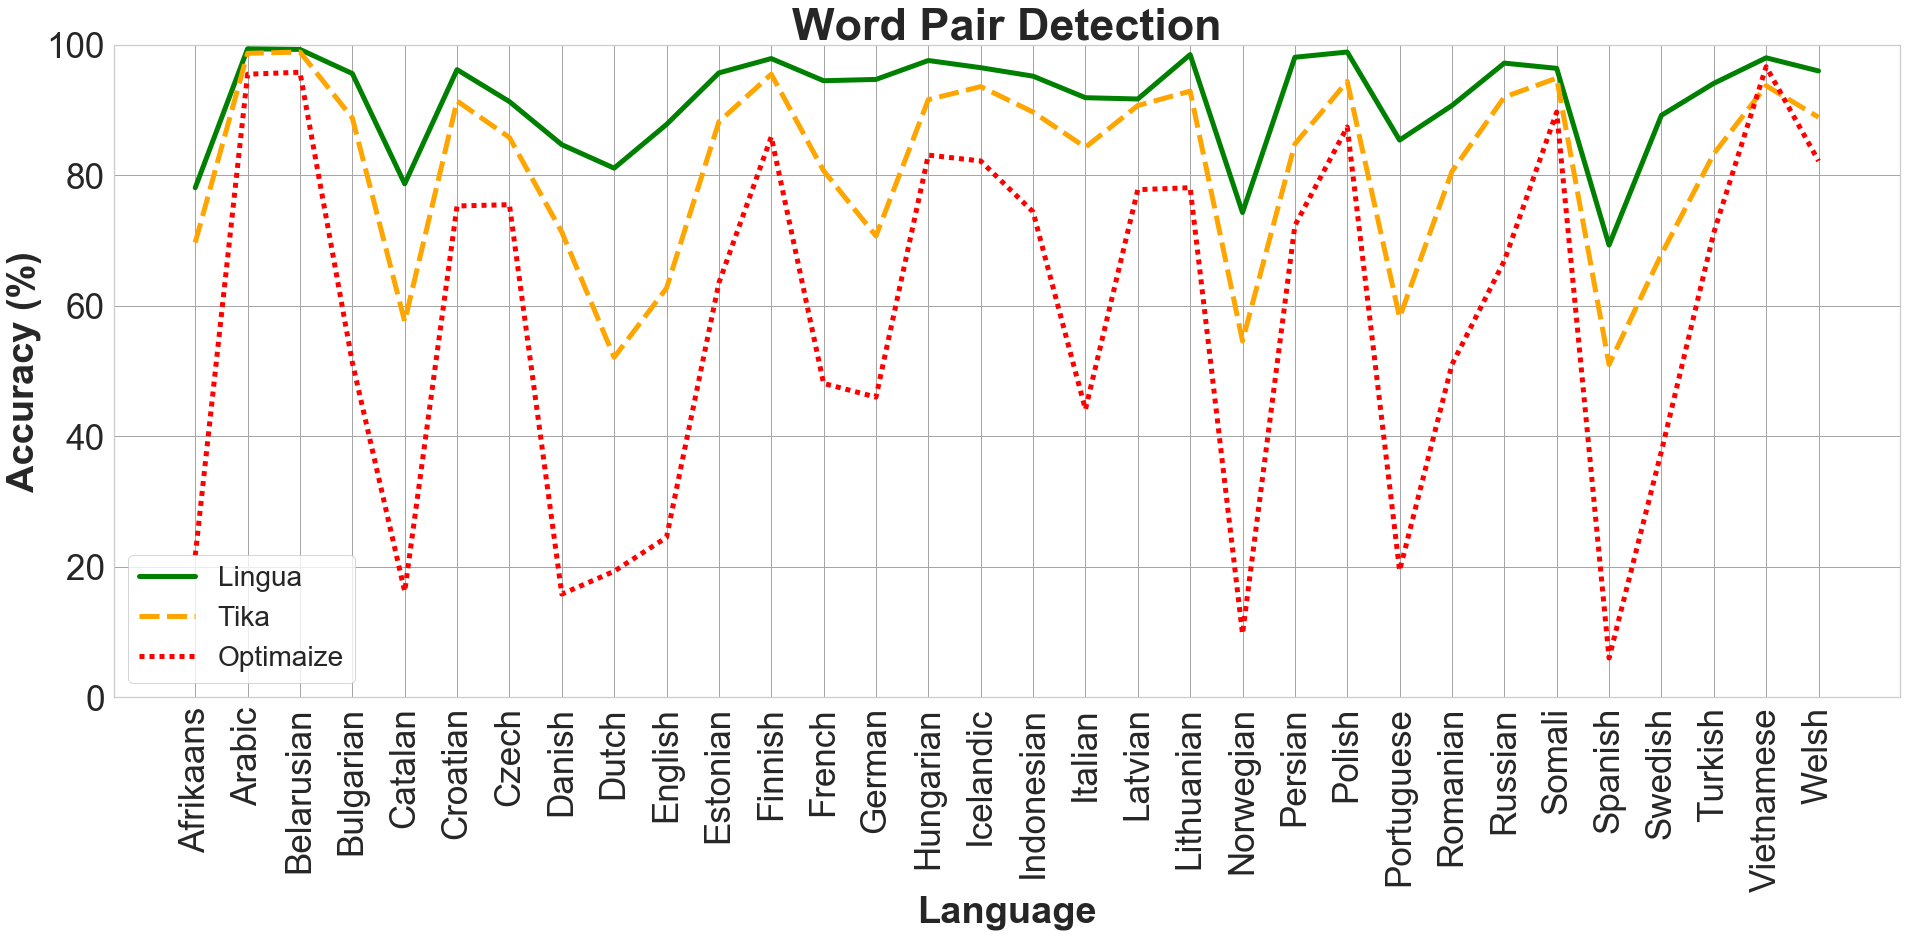

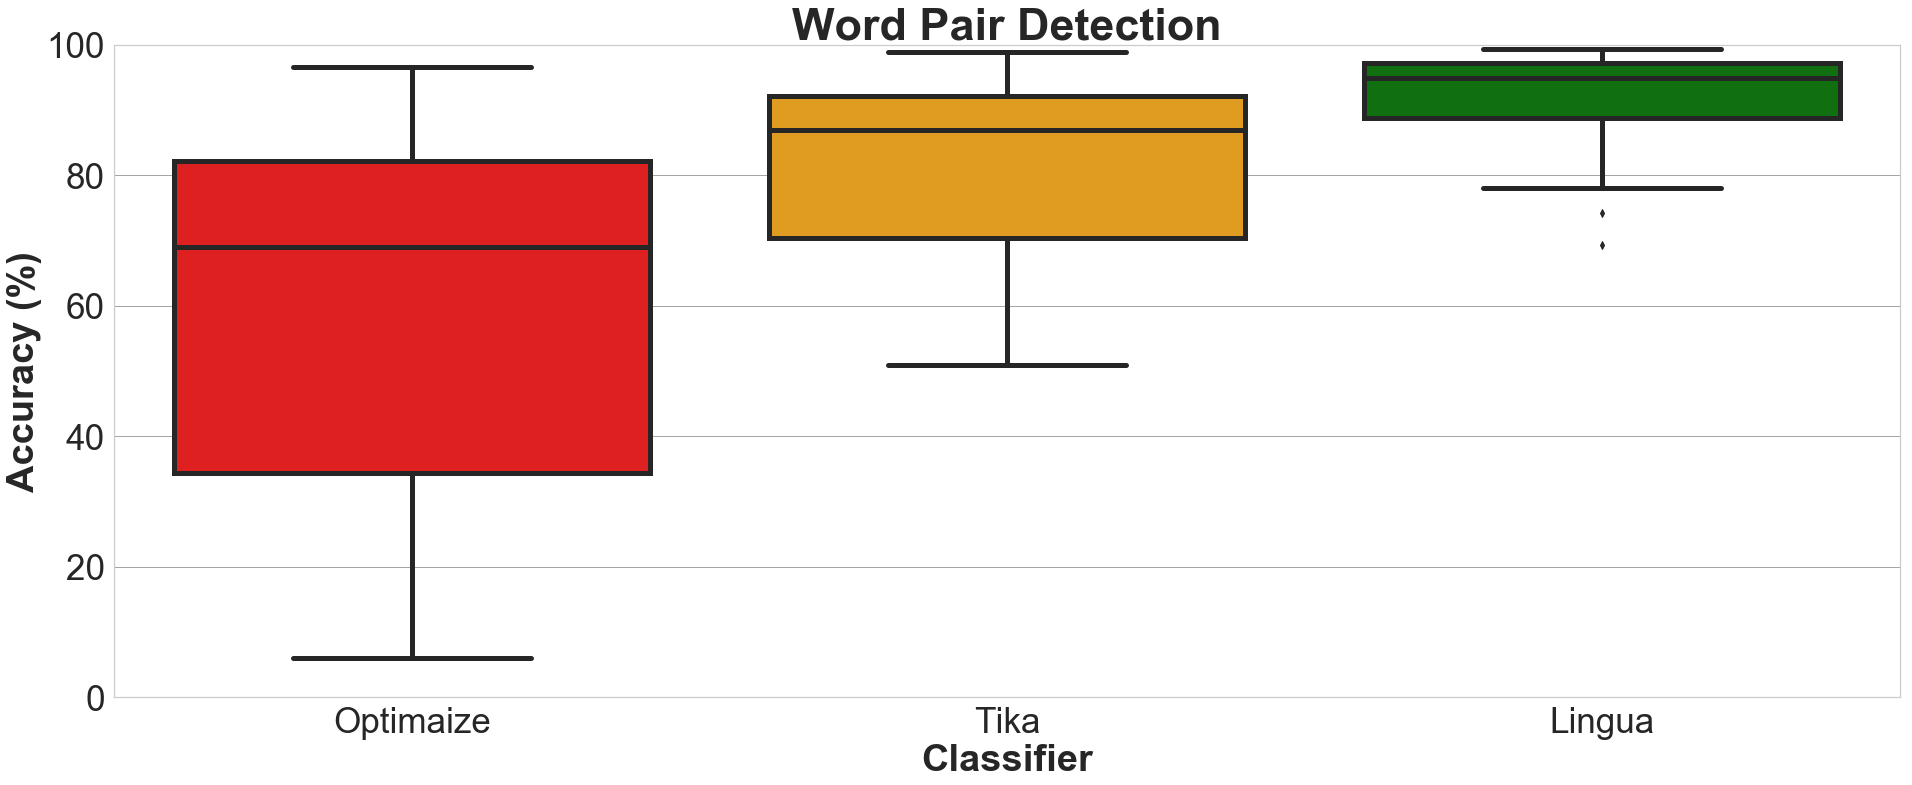

In [38]:
### WORD PAIR DETECTION ACCURACY ###
create_lineplot(
    data=data, 
    columns=['word-pairs-lingua', 'word-pairs-tika', 'word-pairs-optimaize'], 
    title='Word Pair Detection',
    ylim=[0,100]
)

create_boxplot(
    data=data,
    columns=['word-pairs-optimaize', 'word-pairs-tika', 'word-pairs-lingua'],
    title='Word Pair Detection',
    ylim=[0,100]
)

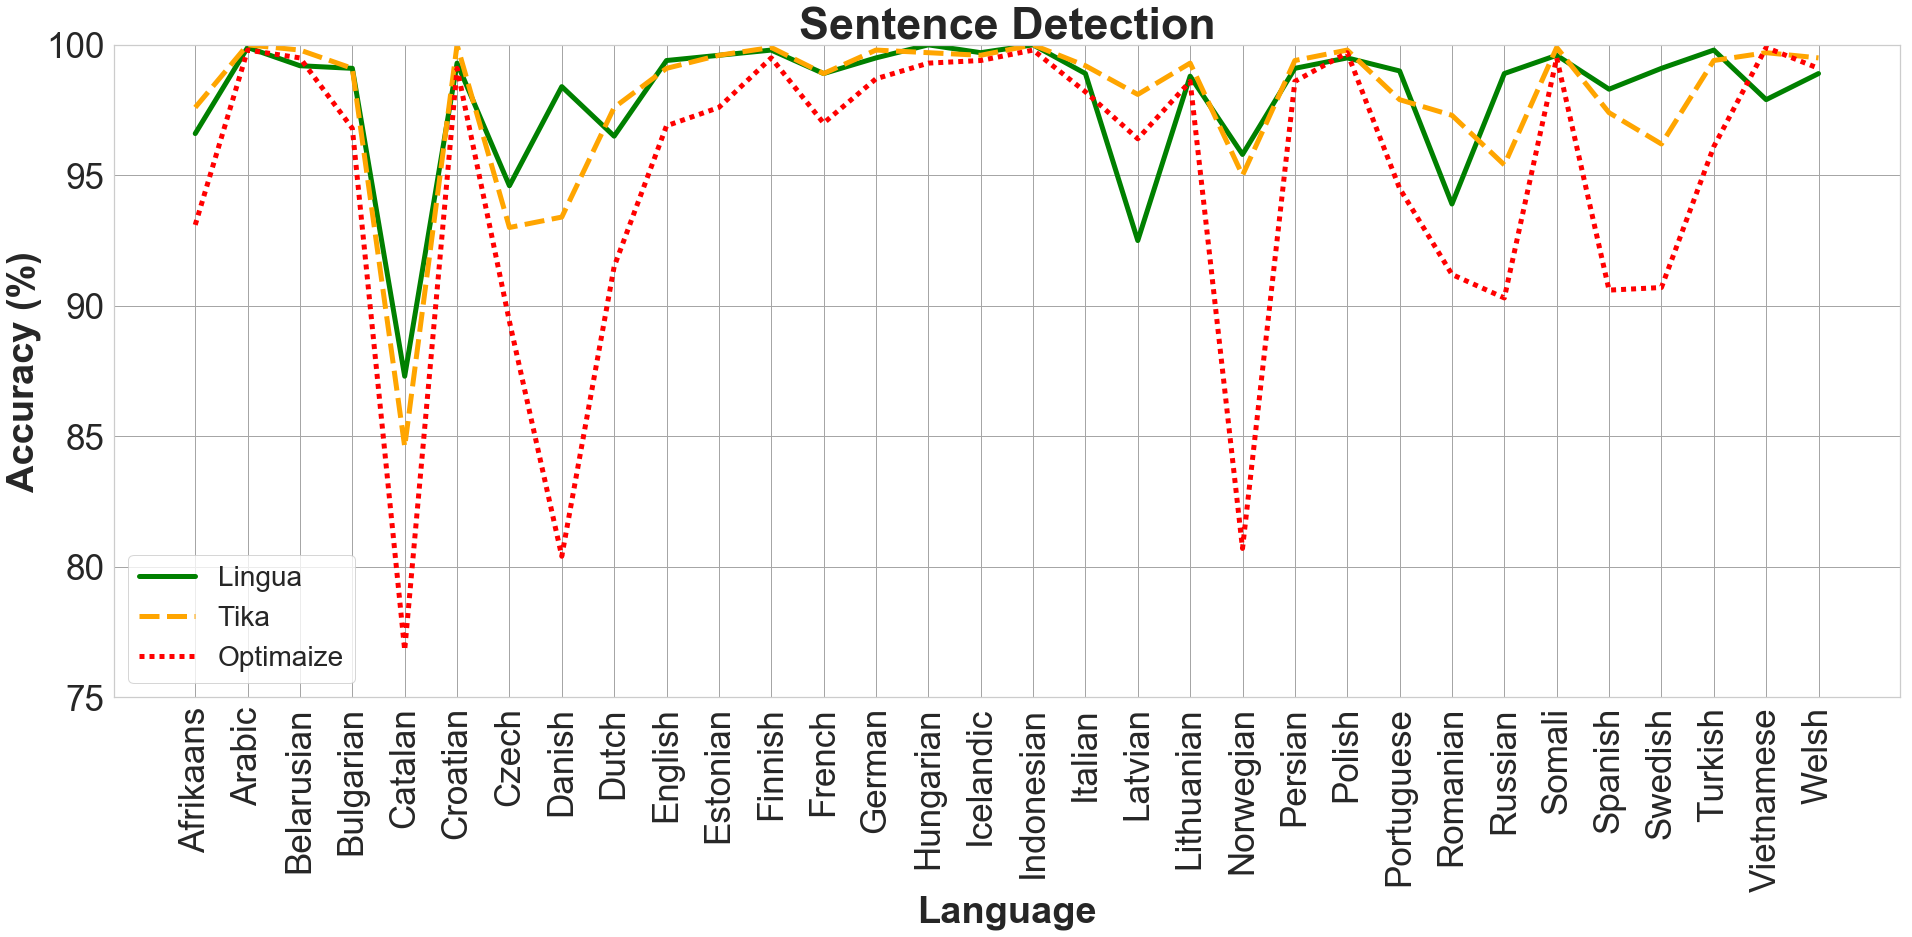

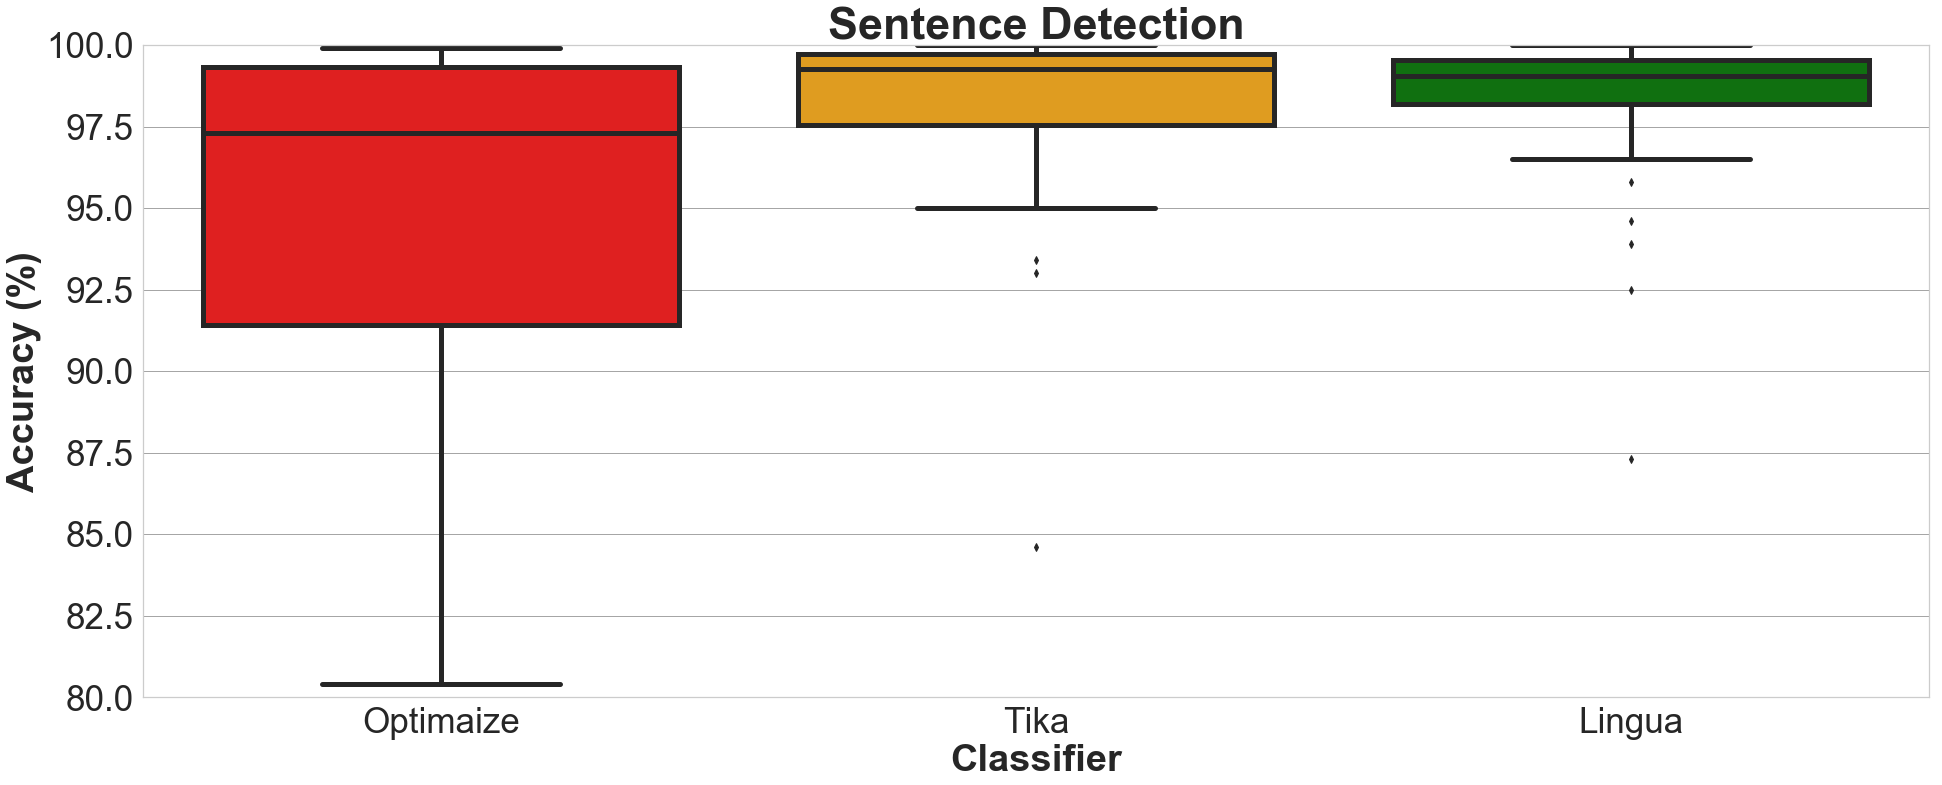

In [39]:
### SENTENCE DETECTION ACCURACY ###
create_lineplot(
    data=data, 
    columns=['sentences-lingua', 'sentences-tika', 'sentences-optimaize'], 
    title='Sentence Detection',
    ylim=[75,100]
)

create_boxplot(
    data=data,
    columns=['sentences-optimaize', 'sentences-tika', 'sentences-lingua'],
    title='Sentence Detection',
    ylim=[80,100]
)

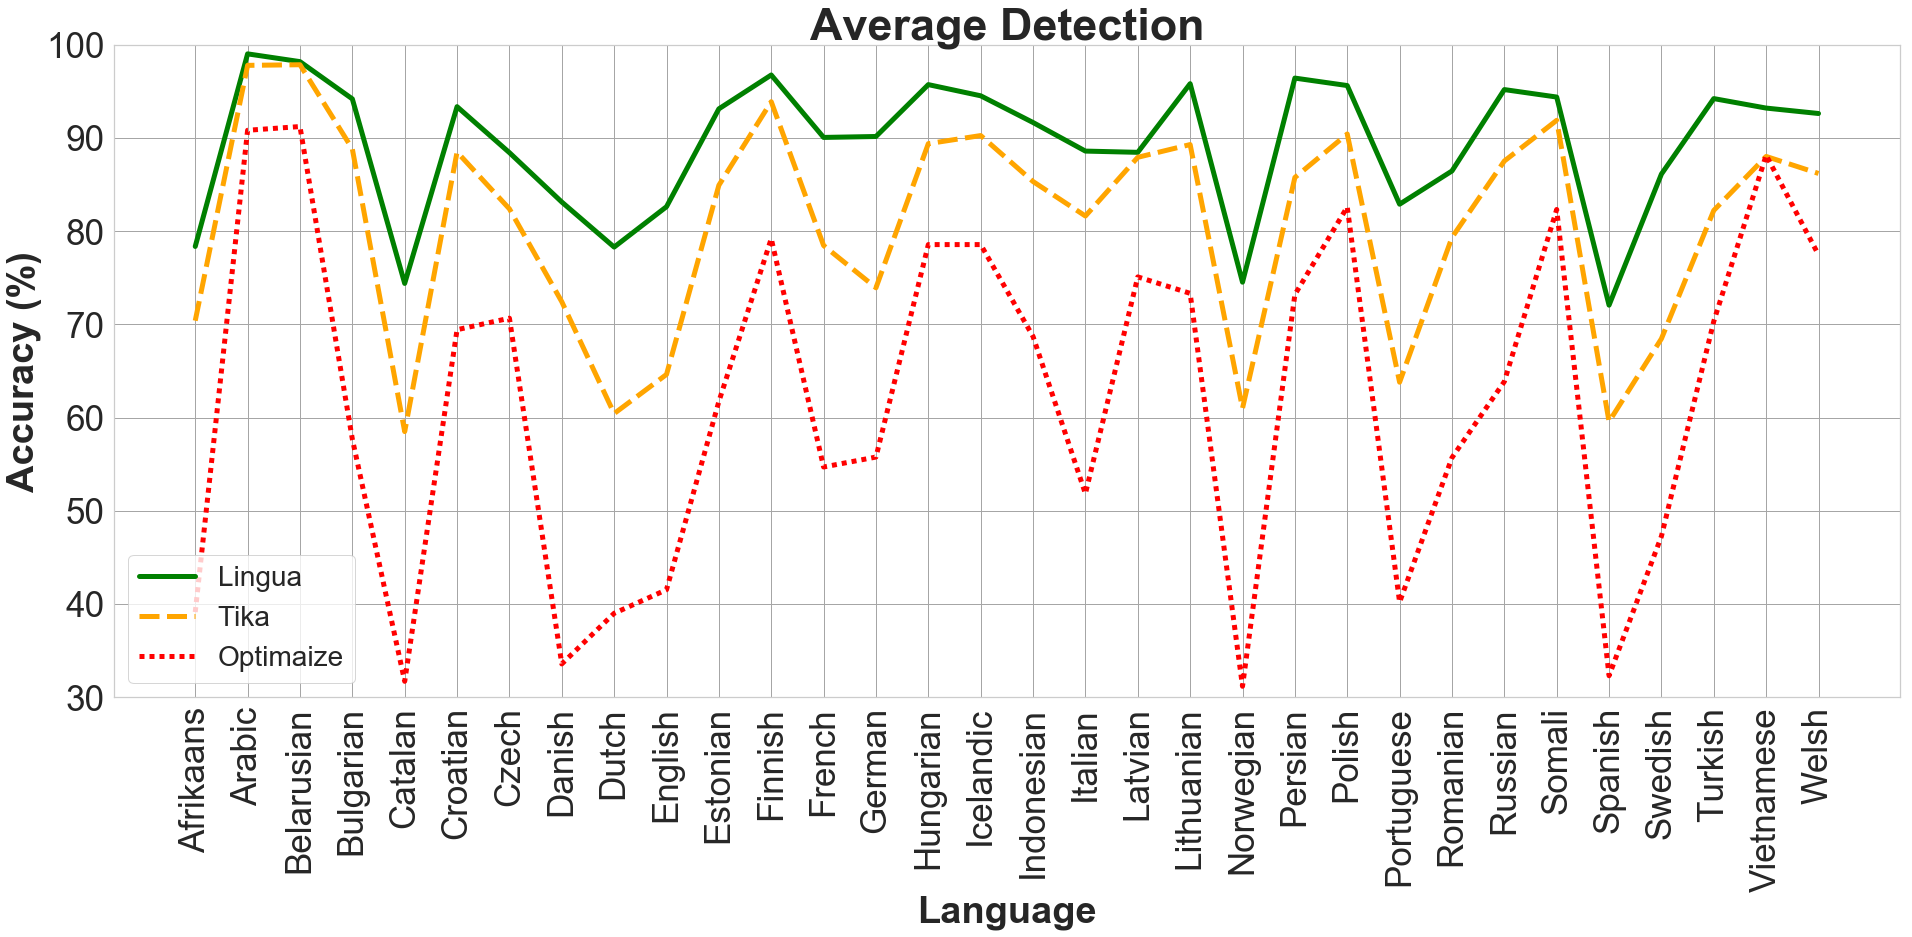

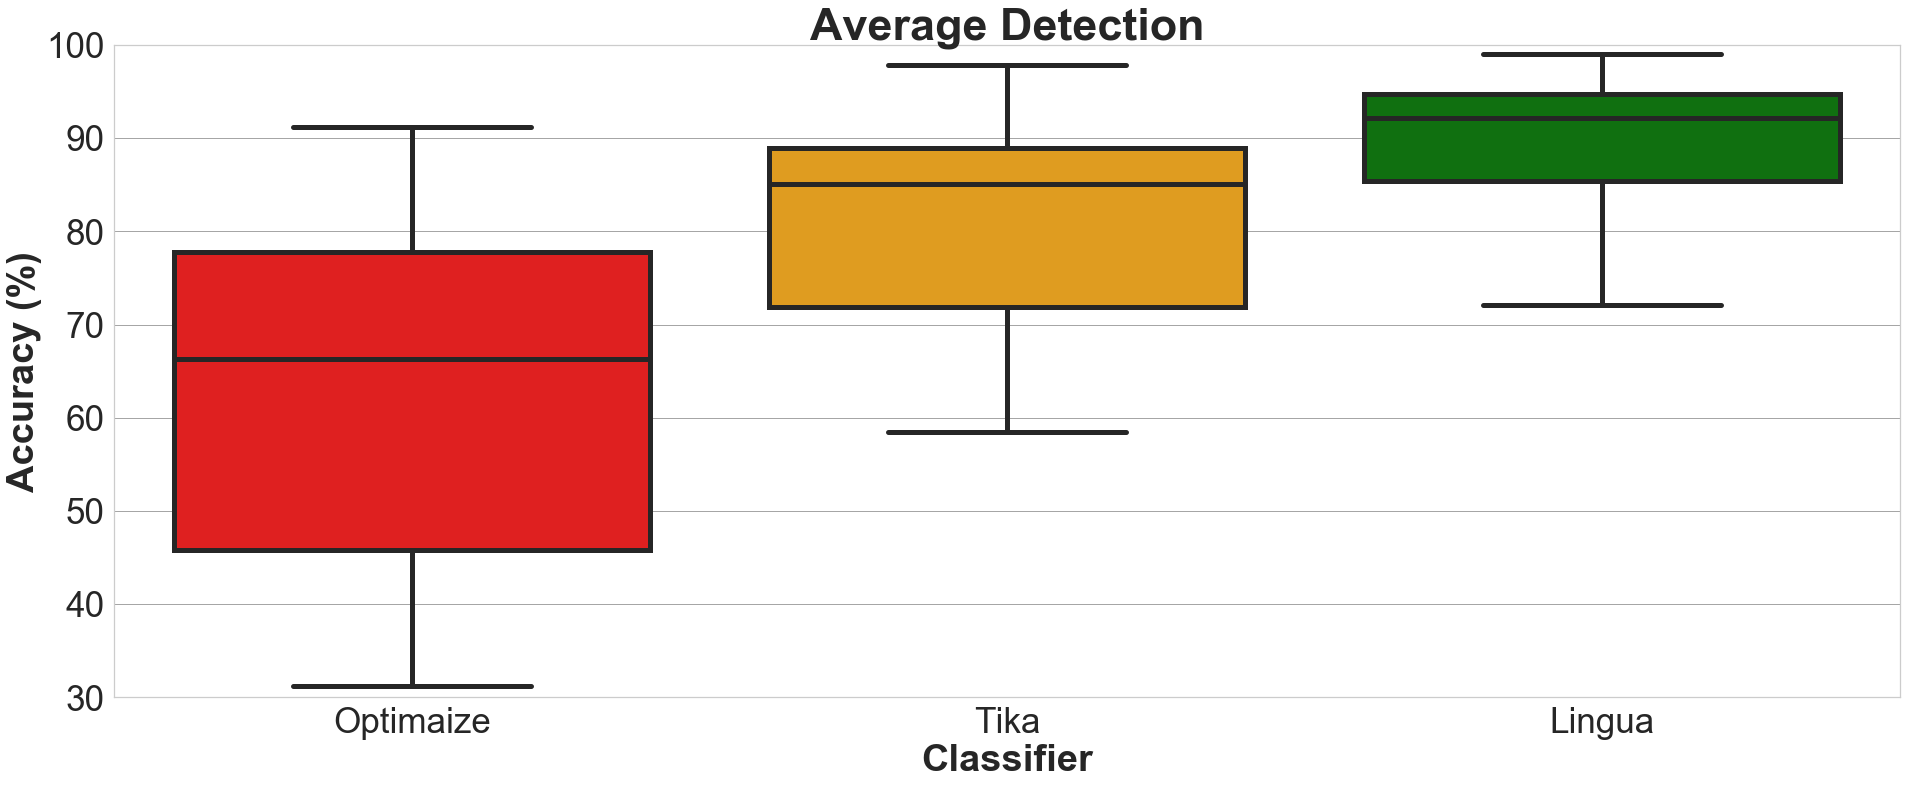

In [40]:
### AVERAGE DETECTION ACCURACY ###
create_lineplot(
    data=data, 
    columns=['average-lingua', 'average-tika', 'average-optimaize'], 
    title='Average Detection',
    ylim=[30,100]
)

create_boxplot(
    data=data,
    columns=['average-optimaize', 'average-tika', 'average-lingua'],
    title='Average Detection',
    ylim=[30,100]
)